In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('default')
import cvxopt as opt
from cvxopt import solvers,matrix
import os
import statsmodels.api as sm

### Question 1: 1. Read all daily price files

In [2]:
# read file names in folder 'data'
files = os.listdir('data/data/')

 # Extract Adjusted Closing Prices
stocks = []
for i in files:
    file = str('data/data/'+str(i))
    stock = pd.read_csv(file, sep=' ', header =None)
    stock.set_index(0, inplace=True)
    stocks.append(stock[6]) 

### 2. Create a price matrix P by aligning the data’s dates and placing the adjusted closing prices side-by-side in columns

In [3]:
# Extract list of stocks to be used as header in Stock Price Dataframe
columns = []    
for i in range(len(files)):
    col = os.path.splitext(files[i])[0]
    columns.append(col)                  

# Dataframe containing the adjusted closing stock prices   
P = pd.DataFrame(stocks).T 
P.columns = columns

# Setting Date as Index
P.index.names = ['Date']
P.head()

,AA,AXP,BA,BAC,CAT,CSCO,CVX,DD,DIS,GE,...,MSFT,PFE,PG,T,TRV,UNH,UTX,VZ,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
20130102,8.731049,57.020516,72.458451,11.796938,86.985691,18.854991,99.922199,40.236449,49.555106,19.443705,...,25.573933,23.627197,63.736154,30.290674,68.337788,52.191287,79.048064,39.192603,64.682086,81.894545
20130103,8.808744,57.263157,72.834518,11.728294,87.822988,18.956960,99.496766,39.727685,49.661781,19.225032,...,25.231341,23.572484,63.332003,30.307983,68.863028,49.751101,79.339787,39.006689,64.271055,81.746841
20130104,8.993272,57.855200,73.041355,11.875388,88.306756,18.984769,100.021768,40.113643,50.612153,19.316146,...,24.759122,23.672791,63.460595,30.489726,69.463305,49.846793,79.970295,39.219161,64.513935,82.125338
20130107,8.837881,58.097841,71.574694,11.855776,88.576552,18.808642,99.342888,40.175048,49.429039,19.252365,...,24.712826,23.691030,63.028896,30.628198,68.525372,49.846793,79.584462,39.564431,63.897385,81.174472
20130108,8.837881,58.427832,69.694366,11.747906,87.450855,18.827180,98.899354,40.394343,49.225385,19.042804,...,24.583196,23.727506,62.927858,30.111005,68.647308,49.186509,78.624595,38.601629,64.074873,81.682219


### 3. From the P matrix, create a matrix of simple (not logarithmic) daily returns R

In [4]:
# Daily Return Calculation
R = P/P.shift(1) - 1  
R.dropna(inplace=True)
R.head()

,AA,AXP,BA,BAC,CAT,CSCO,CVX,DD,DIS,GE,...,MSFT,PFE,PG,T,TRV,UNH,UTX,VZ,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
20130103,0.008899,0.004255,0.005190,-0.005819,0.009626,0.005408,-0.004258,-0.012644,0.002153,-0.011246,...,-0.013396,-0.002316,-0.006341,0.000571,0.007686,-0.046755,0.003690,-0.004744,-0.006355,-0.001804
20130104,0.020948,0.010339,0.002840,0.012542,0.005508,0.001467,0.005277,0.009715,0.019137,0.004739,...,-0.018716,0.004255,0.002030,0.005997,0.008717,0.001923,0.007947,0.005447,0.003779,0.004630
20130107,-0.017279,0.004194,-0.020080,-0.001651,0.003055,-0.009277,-0.006787,0.001531,-0.023376,-0.003302,...,-0.001870,0.000770,-0.006803,0.004542,-0.013503,0.000000,-0.004825,0.008804,-0.009557,-0.011578
20130108,0.000000,0.005680,-0.026271,-0.009099,-0.012709,0.000986,-0.004465,0.005458,-0.004120,-0.010885,...,-0.005245,0.001540,-0.001603,-0.016886,0.001779,-0.013246,-0.012061,-0.024335,0.002778,0.006255
20130109,-0.002198,0.000997,0.035478,-0.045910,0.004681,-0.000492,0.002563,0.008469,0.000394,0.002392,...,0.005650,0.017294,0.005401,-0.003202,0.010247,0.018872,0.011969,-0.002320,-0.000292,-0.003843


### 4. Compute the vector of average daily returns mu for the companies

In [5]:
#Mean Daily Returns
mu = R.mean()  
mu

AA      0.000225
AXP     0.000473
BA      0.000945
BAC     0.000540
CAT    -0.000340
CSCO    0.000563
CVX    -0.000295
DD      0.000339
DIS     0.001099
GE      0.000425
HD      0.001033
HPQ     0.001010
IBM    -0.000270
INTC    0.000669
JNJ     0.000521
JPM     0.000637
KO      0.000240
MCD     0.000290
MMM     0.000705
MRK     0.000468
MSFT    0.000901
PFE     0.000491
PG      0.000233
T       0.000139
TRV     0.000595
UNH     0.001255
UTX     0.000200
VZ      0.000226
WMT     0.000022
XOM    -0.000107
dtype: float64

### 5. Compute the covariance matrix Q from the return matrix

In [6]:
# Covariance Matrix of daily returns
Q = R.cov() 
Q.iloc[:5,:5]

,AA,AXP,BA,BAC,CAT
AA,0.000342,0.000079,0.000080,0.000097,0.000104
AXP,0.000079,0.000144,0.000066,0.000088,0.000062
BA,0.000080,0.000066,0.000169,0.000076,0.000058
BAC,0.000097,0.000088,0.000076,0.000215,0.000075
CAT,0.000104,0.000062,0.000058,0.000075,0.000166


### 6. Save the return vector mu and covariance matrix Q in the native format for your programming language

In [7]:
# Saving Data in Native format for future use
I = [[mu],[Q]] 
input_data  = pd.DataFrame(I)
input_data.to_pickle('input') 

### Question 2: Write a function called port that uses standard quadratic programming libraries

In [8]:
def port(mu, Q, tau):
    n = len(mu)
    
    # minimize utility function 0.5 x.T * Q * x - tau * x.T * mu
    P = matrix(Q.values)
    q = matrix(-tau *mu)
    
    # inequality constrains 0<=xi<=0.1
    G = np.vstack((-np.eye(n),np.eye(n)))
    G = matrix(G)
    y = np.array([0,0.1])
    h = np.repeat(y,n) 
    h = matrix(h)
    
    #equality constrain Summation xi = 1
    A = matrix(1.0,(1,n))
    b = matrix([1.0])
    
    solvers.options['show_progress']=False
    sol = solvers.qp(P,q,G,h,A,b)
    
    return np.array(sol['x'])

### Question 3: 1. Load the data in the input.pickle

In [9]:
# Load data from Native files 
mu_Q = pd.read_pickle('input') 
mu = mu_Q[0][0]
Q = mu_Q[0][1]

### 2. Create a sequence TAU containing numbers from zero to 0.5 in steps of 0.001

In [10]:
# generating array of tau with 500 values 
tau = np.arange(0,0.5,0.001) 

### 3. Run through a loop for each value of your TAU sequence to
### 4. Find the optimum portfolio with the given mu, Q, and tau selected from TAU

In [33]:
weights = []
for i in tau:
    
    #using port function to calculate optimal weights
    weight = port(mu, Q , i) 
    
    #List of optimal weights of each stock for different values of Tau
    weights.append(weight.T) 
    
    
ret = []
var = [] 
for i in range(len(weights)):
    mu =mu.reshape(30,1)
    #calculation of portfolio returns
    re = np.matmul(weights[i],mu)
    # List of portfolio returns corresponding to each value of Tau
    ret.append(re[0][0])
    #calculation of portfolio variance
    va = np.matmul(np.matmul(weights[i],Q),weights[i].T) 
    # List of portfolio variances corresponding to each value of Tau
    var.append(va[0][0])          

### 5. Compute the optimum portfolio’s expected return and standard deviation of return; and - Store the portfolio return and standard deviation.

In [12]:
# Data frame conatining portfolio return and variance corresponding 
# to different values of Tau
efficient_frontire = pd.DataFrame({'Tau': tau, 'Return': ret, 'Variance':var}, 
                                  columns=['Tau','Return','Variance'])
efficient_frontire.head()

,Tau,Return,Variance
0,0.000,0.000266,0.000044
1,0.001,0.000293,0.000044
2,0.002,0.000324,0.000044
3,0.003,0.000354,0.000045
4,0.004,0.000381,0.000045


### 6. After completing the loop, plot the efficient frontier.

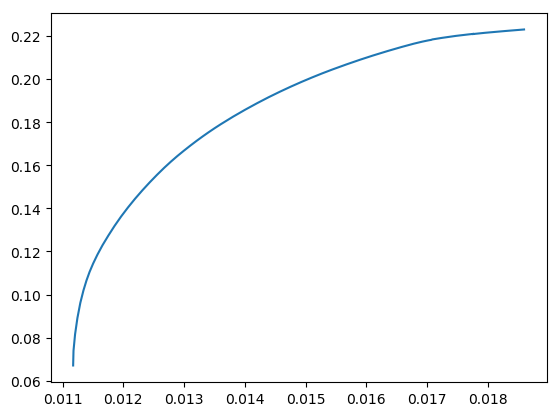

In [13]:
#Plot of efficient frontier using 500 portfolios 
plt.plot(efficient_frontire['Variance']*252,efficient_frontire['Return']*252)
plt.show()

### Question 4: 1. Read in this Dow-Jones data

In [14]:
#load data
df = pd.read_csv('Midtermdata/Midtermdata/data.tsv',sep='\t')
df.index.names = ['Date'] 

### 2. Convert the matrix of daily prices to daily simple returns (not logarithmic returns)

In [15]:
#calculate daily return

Rts = df/df.shift(1) - 1 
Rts.dropna(inplace=True)

### 3. Annualize the returns by multiplying them by 252 (the typical number of trading days in a year)

In [16]:
# Annual Return
Rts_annual = Rts.mean()*252  

# Annual Return of all stocks except DJ Index
Rts_annual = Rts_annual[1:] 
Rts_annual

AAPL    0.123361
AXP    -0.139215
BA      0.225636
CAT    -0.272829
CSCO    0.241014
CVX    -0.203404
DD      0.004449
DIS     0.281967
GE      0.203768
GS      0.039268
HD      0.302681
IBM    -0.078815
INTC    0.080830
JNJ    -0.013180
JPM     0.125468
KO      0.082271
MCD     0.247729
MMM     0.076478
MRK    -0.005602
MSFT    0.219813
NKE     0.394680
PFE     0.199745
PG     -0.067330
TRV     0.164543
UNH     0.273932
UTX    -0.012582
V       0.415225
VZ     -0.012023
WMT    -0.231585
XOM    -0.097806
dtype: float64

### 4. Move the index column out of the matrix and into a separate vector

In [17]:
# Seperating Index returns from Data frame
Rts_stocks = Rts.drop('^DJI', axis =1) 
Rts_index = Rts['^DJI']
Rts_index.head()

Date
20141030    0.013026
20141031    0.011346
20141103   -0.001396
20141104    0.001013
20141105    0.005792
Name: ^DJI, dtype: float64

### 5. Compute a covariance matrix Qts based on the time-series of returns

In [18]:
# Covariance Matrix of Stocls based on daily stock returns
Qts = Rts_stocks.cov()*252 

### 6. Print out the first five rows and five columns of the covariance matrix

In [19]:
# Printing  5 x 5 Covariance Matrix
Qts.iloc[:5,:5] 

,AAPL,AXP,BA,CAT,CSCO
AAPL,0.068213,0.020492,0.032211,0.029778,0.030794
AXP,0.020492,0.046829,0.014721,0.019933,0.013747
BA,0.032211,0.014721,0.045946,0.023461,0.025543
CAT,0.029778,0.019933,0.023461,0.061852,0.024690
CSCO,0.030794,0.013747,0.025543,0.024690,0.050005


### Question 5: 1. Use a loop to regress each company’s returns onto the index returns

In [20]:
name = list(Rts_stocks)

#Index Return Vector i.e. Independent variable
X = sm.add_constant(Rts_index) 
intercepts = []
slopes = []
idosds = [] 
ret_predt = []

for i in name:    
    
    # Regression of Stock Returns = Intercept + Beta * Index Return 
    result = sm.OLS(Rts_stocks[i],X).fit() 
    
    # Extracting Intercept
    intercept = result.params[0]           
    intercepts.append(intercept)
    
    # Extracting Beta
    slope = result.params[1]               
    slopes.append(slope)
    
    # Extracting standard deviation residuals
    idosd = result.resid.std()  
    
    # Extracting mean daily predicted stock return
    idosds.append(idosd)
    re_pre = result.fittedvalues.mean()    
    ret_predt.append(re_pre)
    
# List of annualized predicted stock returns
ret_predt = np.array(ret_predt)*252       

### 2. Print a table of intercepts, slopes ("i), and idiosyncratic standard deviations #Ri for all companies i = 1, ..., 30

In [21]:
# Data frame containing Alpha i.e. Intercept, Betas, and Std of residuals
regression = pd.DataFrame({'Intercept':intercepts, 'Beta':slopes, 'Idosync': idosds}, 
                          columns=['Intercept', 'Beta', 'Idosync'])
regression['Stocks'] = name
regression.set_index('Stocks', inplace=True)
regression

,Intercept,Beta,Idosync
Stocks,,,
AAPL,0.000268,1.138782,0.012475
AXP,-0.000719,0.853526,0.011009
BA,0.000697,1.019695,0.009490
CAT,-0.001290,1.063530,0.012045
CSCO,0.000750,1.060068,0.009936
CVX,-0.001031,1.148306,0.012780
DD,-0.000181,1.020580,0.011313
DIS,0.000940,0.917125,0.010339
GE,0.000601,1.065219,0.009995


### 3. Compute and print the variance of the index’s return

In [22]:
# Variance of daily index returns
var_m = Rts_index.var() 
var_m 

8.873132931214239e-05

### 4. Compute the single-index approximation to the covariance matrix Qsi using your computed var_m, Beta_i and var of error of Ri for all i 

In [23]:
Bet = regression['Beta'].values

# Betas = Beta_i * Beta_j
Betas = np.matmul(np.matrix(Bet).T,np.matrix(Bet))

# Covariance Matrix of ith & jth sectrity = Market Variance * Beta_i * Beta_j 
Cov_s = var_m*Betas
idosync = regression['Idosync']**2
diag = np.diag(idosync)

#Diagonal of Covariance matrix = Market Var * Beta_i * Beta_j + Variance of residuals
Qsi = Cov_s + diag

# Annualizing the covariance of the portfolio
Qsi = Qsi * 252

### 5. Print the first five rows and columns of this covariance matrix.

In [24]:
# Converting Qsi in presentable form
Qsi = pd.DataFrame(Qsi) 
Qsi['Stocks'] = name
Qsi.set_index('Stocks',inplace=True)
Qsi.columns = name
Qsi.iloc[:5,:5]

,AAPL,AXP,BA,CAT,CSCO
Stocks,,,,,
AAPL,0.068213,0.021734,0.025965,0.027081,0.026993
AXP,0.021734,0.046829,0.019461,0.020298,0.020231
BA,0.025965,0.019461,0.045946,0.024249,0.024170
CAT,0.027081,0.020298,0.024249,0.061852,0.025209
CSCO,0.026993,0.020231,0.024170,0.025209,0.050005


### Question 6: 1. Weight Calculation for  Qsi and Qts

In [34]:
# generating array of tau with 500 values
tau = np.arange(0,0.5,0.001)

weights_Qts = []
for i in tau:
    
    #using port function to calculate optimal weights
    weight_Qts = port(Rts_annual, Qts , i)  
    
    #List of optimal weights of each stock for different values of Tau
    weights_Qts.append(weight_Qts.T)        
ret_Qts = []
var_Qts = [] 
for i in range(len(weights_Qts)):
    Rts_annual = Rts_annual.reshape(30,1)
    
    #calculation of portfolio returns
    re_Qts = np.matmul(weights_Qts[i],Rts_annual)                            
    ret_Qts.append(re_Qts[0][0])
    
    #calculation of portfolio variance
    va_Qts = np.matmul(np.matmul(weights_Qts[i],Qts),weights_Qts[i].T)      
    var_Qts.append(va_Qts[0][0])

In [26]:
#Data frame conatining portfolio return and variance corresponding
# to different values of Tau
efficient_frontire_Qts = pd.DataFrame({'Tau': tau, 'Return': ret_Qts, 
                                       'Variance':var_Qts},
                                      columns=['Tau','Return','Variance'])

In [27]:
efficient_frontire_Qts.head()

,Tau,Return,Variance
0,0.000,0.024499,0.017244
1,0.001,0.035062,0.017255
2,0.002,0.049184,0.017298
3,0.003,0.065214,0.017378
4,0.004,0.081167,0.017490


### 2. Weight Calculation Based on Qsi calculated  from Single Index Model

In [28]:
weights_Qsi = []
for i in tau:
    
    #using port function to calculate optimal weights
    weight_Qsi = port(ret_predt, Qsi , i)  
    
    #List of optimal weights of each stock for different values of Tau
    weights_Qsi.append(weight_Qsi.T)       
ret_Qsi = []
var_Qsi = [] 
for i in range(len(weights_Qsi)):
    ret_predt = ret_predt.reshape(30,1)
    
    #calculation of portfolio returns
    re_Qsi = np.matmul(weights_Qsi[i],ret_predt)                        
    ret_Qsi.append(re_Qsi[0][0])
    
    #calculation of portfolio variance
    va_Qsi = np.matmul(np.matmul(weights_Qsi[i],Qsi),weights_Qsi[i].T)  
    var_Qsi.append(va_Qsi[0][0])

In [29]:
# Data frame conatining portfolio return and variance corresponding 
# to different values of Tau
efficient_frontire_Qsi = pd.DataFrame({'Tau': tau, 'Return': ret_Qsi, 
                                       'Variance':var_Qsi}, 
                                      columns=['Tau','Return','Variance'])

In [30]:
efficient_frontire_Qsi.head()

,Tau,Return,Variance
0,0.000,0.036142,0.016923
1,0.001,0.045141,0.016932
2,0.002,0.054110,0.016959
3,0.003,0.063198,0.017005
4,0.004,0.076747,0.017100


### 3. Plot the efficient frontier using the time-series approximation to Qts in blue, and superimpose the efficient frontier computed with the single index covariance model Qsi in red.

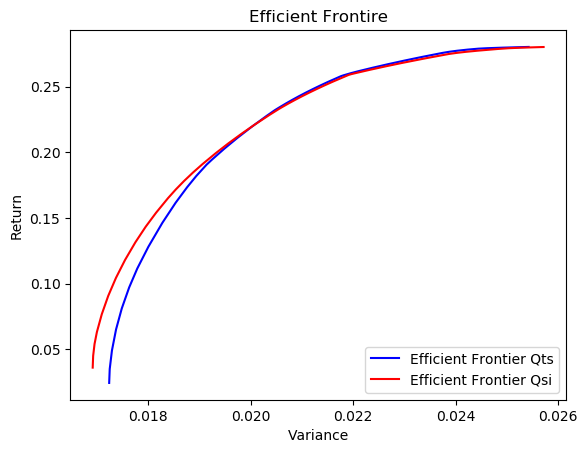

In [31]:
# Plot of Qts and Qsi Efficient Frontiers
plt.plot(efficient_frontire_Qts['Variance'],efficient_frontire_Qts['Return'],'b', 
         label = 'Efficient Frontier Qts')

plt.plot(efficient_frontire_Qsi['Variance'],efficient_frontire_Qsi['Return'],'r', 
         label = 'Efficient Frontier Qsi')

plt.title('Efficient Frontire')
plt.xlabel('Variance')
plt.ylabel('Return')
plt.legend(loc = 4)
plt.show()

### Do you think the results are similar enough that the single-index covariance model is valid?

##### Yes, I think results are similar enough that the single-index covariance model is valid. This is clear from the graphs of efficient frontiers above for Qts i.e. covariance matrix using return data from market and Qsi i.e. covariance matrix using data generated  using single-index factor model. 